# Data Analysis on Corona District Level


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
cor = pd.read_csv("district_level_latest.csv")

In [4]:
cor

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
0,0,UN,State Unassigned,UN_Unassigned,Unassigned,0,0,0,0,0,0,0,0,0,NaN,NaN
1,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
2,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
3,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
4,0,AP,Andhra Pradesh,AP_Foreign Evacuees,Foreign Evacuees,434,0,434,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,733,CH,Chandigarh,CH_Unknown,Unknown,0,0,0,0,0,0,0,0,0,NaN,NaN
770,734,CT,Chhattisgarh,CT_Unknown,Unknown,0,0,0,0,0,0,0,0,0,NaN,NaN
771,735,DN,Dadra and Nagar Haveli and Daman and Diu,DN_Unknown,Unknown,0,0,0,0,0,0,0,0,0,NaN,NaN
772,737,DL,Delhi,DL_Unknown,Unknown,140743,9561,127124,4058,0,0,0,0,0,NaN,NaN


Describing the data to find measure


In [5]:
cor.describe()

,SlNo,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,Last_Updated
count,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,0.0
mean,360.073643,2616.143411,851.501292,1710.943152,53.073643,0.582687,76.763566,15.890181,59.750646,1.122739,NaN
std,222.892919,10098.501722,2942.125995,7698.671066,334.345691,10.748459,208.020205,157.831774,242.035618,4.376425,NaN
min,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,-5.000000,-3394.000000,-3.000000,-2.000000,NaN
25%,166.250000,239.250000,59.250000,84.250000,0.000000,0.000000,2.000000,-1.000000,0.000000,0.000000,NaN
50%,359.500000,671.000000,219.000000,393.500000,4.000000,0.000000,19.000000,2.000000,9.000000,0.000000,NaN
75%,552.750000,1656.000000,569.000000,1008.000000,18.000000,0.000000,67.000000,27.000000,34.000000,1.000000,NaN
max,766.000000,140743.000000,41121.000000,127124.000000,6648.000000,297.000000,3091.000000,1615.000000,4650.000000,62.000000,NaN


In [6]:
ass = cor["Confirmed"].describe()
ass

count       774.000000
mean       2616.143411
std       10098.501722
min           0.000000
25%         239.250000
50%         671.000000
75%        1656.000000
max      140743.000000
Name: Confirmed, dtype: float64

In [7]:
cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SlNo             774 non-null    int64  
 1   State_Code       774 non-null    object 
 2   State            774 non-null    object 
 3   District_Key     774 non-null    object 
 4   District         774 non-null    object 
 5   Confirmed        774 non-null    int64  
 6   Active           774 non-null    int64  
 7   Recovered        774 non-null    int64  
 8   Deceased         774 non-null    int64  
 9   Migrated_Other   774 non-null    int64  
 10  Delta_Confirmed  774 non-null    int64  
 11  Delta_Active     774 non-null    int64  
 12  Delta_Recovered  774 non-null    int64  
 13  Delta_Deceased   774 non-null    int64  
 14  District_Notes   60 non-null     object 
 15  Last_Updated     0 non-null      float64
dtypes: float64(1), int64(10), object(5)
memory usage: 96.9+ KB


In [8]:
unistate_code = cor["State_Code"].unique()
print(unistate_code)

['UN' 'AN' 'AP' 'AR' 'AS' 'BR' 'CH' 'CT' 'DL' 'DN' 'GA' 'GJ' 'HP' 'HR'
 'JH' 'JK' 'KA' 'KL' 'LA' 'LD' 'MH' 'ML' 'MN' 'MP' 'MZ' 'NL' 'OR' 'PB'
 'PY' 'RJ' 'SK' 'TG' 'TN' 'TR' 'UP' 'UT' 'WB']


In [9]:
unistate = cor["State"].unique()
print(unistate)

['State Unassigned' 'Andaman and Nicobar Islands' 'Andhra Pradesh'
 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Delhi'
 'Dadra and Nagar Haveli and Daman and Diu' 'Goa' 'Gujarat'
 'Himachal Pradesh' 'Haryana' 'Jharkhand' 'Jammu and Kashmir' 'Karnataka'
 'Kerala' 'Ladakh' 'Lakshadweep' 'Maharashtra' 'Meghalaya' 'Manipur'
 'Madhya Pradesh' 'Mizoram' 'Nagaland' 'Odisha' 'Punjab' 'Puducherry'
 'Rajasthan' 'Sikkim' 'Telangana' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [10]:
for col in cor:
    print(cor[col].unique())

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83 101  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98 100 102 103 104 105 106 107 108
 109 110 111 112  99 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 766 144 145
 146 147 148 149 150 151 152 153 154 141 142 143 155 156 157 158 159 160
 161 162 163 164 165 167 187 166 168 169 170 171 173 172 175 174 176 177
 178 179 180 181 182 183 184 185 186 188 189 212 213 214 215 216 217 218
 219 220 221 222 223 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 246 247 248 249 250 264 251 252 253
 254 255 256 257 258 259 260 261 262 265 266 267 26

['Unassigned' 'Nicobars' 'North and Middle Andaman' 'South Andaman'
 'Foreign Evacuees' 'Anantapur' 'Chittoor' 'East Godavari' 'Guntur'
 'Krishna' 'Kurnool' 'Other State' 'Prakasam' 'S.P.S. Nellore'
 'Srikakulam' 'Visakhapatnam' 'Vizianagaram' 'West Godavari'
 'Y.S.R. Kadapa' 'Anjaw' 'Changlang' 'East Kameng' 'East Siang' 'Kamle'
 'Kra Daadi' 'Kurung Kumey' 'Lepa Rada' 'Lohit' 'Longding'
 'Lower Dibang Valley' 'Lower Siang' 'Lower Subansiri' 'Namsai'
 'Pakke Kessang' 'Papum Pare' 'Shi Yomi' 'Siang' 'Tawang' 'Tirap'
 'Upper Dibang Valley' 'Upper Siang' 'Upper Subansiri' 'West Kameng'
 'West Siang' 'Airport Quarantine' 'Baksa' 'Barpeta' 'Biswanath'
 'Bongaigaon' 'Cachar' 'Charaideo' 'Chirang' 'Darrang' 'Dhemaji' 'Dhubri'
 'Dibrugarh' 'Dima Hasao' 'Goalpara' 'Golaghat' 'Hailakandi' 'Hojai'
 'Jorhat' 'Kamrup' 'Kamrup Metropolitan' 'Karbi Anglong' 'Karimganj'
 'Kokrajhar' 'Lakhimpur' 'Majuli' 'Morigaon' 'Nagaon' 'Nalbari'
 'Sivasagar' 'Sonitpur' 'South Salmara Mankachar' 'Tinsukia' 'Udalgur

In [11]:
cor

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
0,0,UN,State Unassigned,UN_Unassigned,Unassigned,0,0,0,0,0,0,0,0,0,NaN,NaN
1,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
2,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
3,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
4,0,AP,Andhra Pradesh,AP_Foreign Evacuees,Foreign Evacuees,434,0,434,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,733,CH,Chandigarh,CH_Unknown,Unknown,0,0,0,0,0,0,0,0,0,NaN,NaN
770,734,CT,Chhattisgarh,CT_Unknown,Unknown,0,0,0,0,0,0,0,0,0,NaN,NaN
771,735,DN,Dadra and Nagar Haveli and Daman and Diu,DN_Unknown,Unknown,0,0,0,0,0,0,0,0,0,NaN,NaN
772,737,DL,Delhi,DL_Unknown,Unknown,140743,9561,127124,4058,0,0,0,0,0,NaN,NaN


# droping values of 'District notes and Last Update'
             as it have no values

In [12]:
cor = cor.drop('District_Notes',axis=1)

In [13]:
cor = cor.drop(columns = ['Last_Updated'], axis =1)

In [14]:
cor

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased
0,0,UN,State Unassigned,UN_Unassigned,Unassigned,0,0,0,0,0,0,0,0,0
1,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,0,0,0,0,0
2,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,0,0,0,0,0
3,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,0,0,0,0,0
4,0,AP,Andhra Pradesh,AP_Foreign Evacuees,Foreign Evacuees,434,0,434,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,733,CH,Chandigarh,CH_Unknown,Unknown,0,0,0,0,0,0,0,0,0
770,734,CT,Chhattisgarh,CT_Unknown,Unknown,0,0,0,0,0,0,0,0,0
771,735,DN,Dadra and Nagar Haveli and Daman and Diu,DN_Unknown,Unknown,0,0,0,0,0,0,0,0,0
772,737,DL,Delhi,DL_Unknown,Unknown,140743,9561,127124,4058,0,0,0,0,0


In [15]:
unistate_code = cor["State_Code"].unique()
print(unistate_code)

['UN' 'AN' 'AP' 'AR' 'AS' 'BR' 'CH' 'CT' 'DL' 'DN' 'GA' 'GJ' 'HP' 'HR'
 'JH' 'JK' 'KA' 'KL' 'LA' 'LD' 'MH' 'ML' 'MN' 'MP' 'MZ' 'NL' 'OR' 'PB'
 'PY' 'RJ' 'SK' 'TG' 'TN' 'TR' 'UP' 'UT' 'WB']


In [16]:
unistate = cor["State"].unique()
print(unistate)

['State Unassigned' 'Andaman and Nicobar Islands' 'Andhra Pradesh'
 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Delhi'
 'Dadra and Nagar Haveli and Daman and Diu' 'Goa' 'Gujarat'
 'Himachal Pradesh' 'Haryana' 'Jharkhand' 'Jammu and Kashmir' 'Karnataka'
 'Kerala' 'Ladakh' 'Lakshadweep' 'Maharashtra' 'Meghalaya' 'Manipur'
 'Madhya Pradesh' 'Mizoram' 'Nagaland' 'Odisha' 'Punjab' 'Puducherry'
 'Rajasthan' 'Sikkim' 'Telangana' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [17]:
uniqdis_code = cor["District_Key"].unique()
print(uniqdis_code)

['UN_Unassigned' 'AN_Nicobars' 'AN_North and Middle Andaman'
 'AN_South Andaman' 'AP_Foreign Evacuees' 'AP_Anantapur' 'AP_Chittoor'
 'AP_East Godavari' 'AP_Guntur' 'AP_Krishna' 'AP_Kurnool' 'AP_Other State'
 'AP_Prakasam' 'AP_S.P.S. Nellore' 'AP_Srikakulam' 'AP_Visakhapatnam'
 'AP_Vizianagaram' 'AP_West Godavari' 'AP_Y.S.R. Kadapa' 'AR_Anjaw'
 'AR_Changlang' 'AR_East Kameng' 'AR_East Siang' 'AR_Kamle' 'AR_Kra Daadi'
 'AR_Kurung Kumey' 'AR_Lepa Rada' 'AR_Lohit' 'AR_Longding'
 'AR_Lower Dibang Valley' 'AR_Lower Siang' 'AR_Lower Subansiri'
 'AR_Namsai' 'AR_Pakke Kessang' 'AR_Papum Pare' 'AR_Shi Yomi' 'AR_Siang'
 'AR_Tawang' 'AR_Tirap' 'AR_Upper Dibang Valley' 'AR_Upper Siang'
 'AR_Upper Subansiri' 'AR_West Kameng' 'AR_West Siang'
 'AS_Airport Quarantine' 'AS_Baksa' 'AS_Barpeta' 'AS_Biswanath'
 'AS_Bongaigaon' 'AS_Cachar' 'AS_Charaideo' 'AS_Chirang' 'AS_Darrang'
 'AS_Dhemaji' 'AS_Dhubri' 'AS_Dibrugarh' 'AS_Dima Hasao' 'AS_Goalpara'
 'AS_Golaghat' 'AS_Hailakandi' 'AS_Hojai' 'AS_Jorhat' 'AS_

 'CT_Unknown' 'DN_Unknown' 'DL_Unknown' 'GA_Unknown']


In [18]:
uniqdis = cor["District"].unique()
print(uniqdis)

['Unassigned' 'Nicobars' 'North and Middle Andaman' 'South Andaman'
 'Foreign Evacuees' 'Anantapur' 'Chittoor' 'East Godavari' 'Guntur'
 'Krishna' 'Kurnool' 'Other State' 'Prakasam' 'S.P.S. Nellore'
 'Srikakulam' 'Visakhapatnam' 'Vizianagaram' 'West Godavari'
 'Y.S.R. Kadapa' 'Anjaw' 'Changlang' 'East Kameng' 'East Siang' 'Kamle'
 'Kra Daadi' 'Kurung Kumey' 'Lepa Rada' 'Lohit' 'Longding'
 'Lower Dibang Valley' 'Lower Siang' 'Lower Subansiri' 'Namsai'
 'Pakke Kessang' 'Papum Pare' 'Shi Yomi' 'Siang' 'Tawang' 'Tirap'
 'Upper Dibang Valley' 'Upper Siang' 'Upper Subansiri' 'West Kameng'
 'West Siang' 'Airport Quarantine' 'Baksa' 'Barpeta' 'Biswanath'
 'Bongaigaon' 'Cachar' 'Charaideo' 'Chirang' 'Darrang' 'Dhemaji' 'Dhubri'
 'Dibrugarh' 'Dima Hasao' 'Goalpara' 'Golaghat' 'Hailakandi' 'Hojai'
 'Jorhat' 'Kamrup' 'Kamrup Metropolitan' 'Karbi Anglong' 'Karimganj'
 'Kokrajhar' 'Lakhimpur' 'Majuli' 'Morigaon' 'Nagaon' 'Nalbari'
 'Sivasagar' 'Sonitpur' 'South Salmara Mankachar' 'Tinsukia' 'Udalgur

 'Uttar Dinajpur' 'Unknown']


In [19]:
Confirn_data = cor["Confirmed"].describe()
print(Confirn_data)

count       774.000000
mean       2616.143411
std       10098.501722
min           0.000000
25%         239.250000
50%         671.000000
75%        1656.000000
max      140743.000000
Name: Confirmed, dtype: float64


In [20]:
Active_case = cor['Active'].describe()
print(Active_case)

count      774.000000
mean       851.501292
std       2942.125995
min         -3.000000
25%         59.250000
50%        219.000000
75%        569.000000
max      41121.000000
Name: Active, dtype: float64


In [21]:
Recovered_case = cor["Recovered"].describe()
print(Recovered_case)

count       774.000000
mean       1710.943152
std        7698.671066
min           0.000000
25%          84.250000
50%         393.500000
75%        1008.000000
max      127124.000000
Name: Recovered, dtype: float64


In [22]:
Deceased_case =cor["Deceased"].describe()
print(Deceased_case)

count     774.000000
mean       53.073643
std       334.345691
min         0.000000
25%         0.000000
50%         4.000000
75%        18.000000
max      6648.000000
Name: Deceased, dtype: float64


In [23]:
Migrated_Other_case = cor["Migrated_Other"].describe()
print(Migrated_Other_case)

count    774.000000
mean       0.582687
std       10.748459
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      297.000000
Name: Migrated_Other, dtype: float64


In [24]:
Delta_Confirmed_case = cor["Delta_Confirmed"].describe()
print(Delta_Confirmed_case)

count     774.000000
mean       76.763566
std       208.020205
min        -5.000000
25%         2.000000
50%        19.000000
75%        67.000000
max      3091.000000
Name: Delta_Confirmed, dtype: float64


In [25]:
Delta_Active_case = cor["Delta_Active"].describe()
print(Delta_Active_case)

count     774.000000
mean       15.890181
std       157.831774
min     -3394.000000
25%        -1.000000
50%         2.000000
75%        27.000000
max      1615.000000
Name: Delta_Active, dtype: float64


In [26]:
cor.groupby('State')

print(cor.groupby('State').groups)


{'Andaman and Nicobar Islands': [1, 2, 3, 764], 'Andhra Pradesh': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 765], 'Arunachal Pradesh': [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 766], 'Assam': [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 767], 'Bihar': [79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 768], 'Chandigarh': [117, 769], 'Chhattisgarh': [118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 770], 'Dadra and Nagar Haveli and Daman and Diu': [158, 159, 160, 161, 771], 'Delhi': [147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 772], 'Goa': [162, 163, 164, 773], 'Gujarat': [165, 166, 167, 168, 169, 17

In [27]:
grp = cor.groupby(['State', 'Confirmed'])
for name, group in grp:
    print(name)
    print(group)
    print()

('Andaman and Nicobar Islands', 0)
   SlNo State_Code                        State District_Key  District  \
1     1         AN  Andaman and Nicobar Islands  AN_Nicobars  Nicobars   

   Confirmed  Active  Recovered  Deceased  Migrated_Other  Delta_Confirmed  \
1          0       0          0         0               0                0   

   Delta_Active  Delta_Recovered  Delta_Deceased  
1             0                0               0  

('Andaman and Nicobar Islands', 1)
   SlNo State_Code                        State                 District_Key  \
2     2         AN  Andaman and Nicobar Islands  AN_North and Middle Andaman   

                   District  Confirmed  Active  Recovered  Deceased  \
2  North and Middle Andaman          1       0          1         0   

   Migrated_Other  Delta_Confirmed  Delta_Active  Delta_Recovered  \
2               0                0             0                0   

   Delta_Deceased  
2               0  

('Andaman and Nicobar Islands', 51)
 

    SlNo State_Code              State  District_Key   District  Confirmed  \
26    24         AR  Arunachal Pradesh  AR_Lepa Rada  Lepa Rada         13   

    Active  Recovered  Deceased  Migrated_Other  Delta_Confirmed  \
26       2         11         0               0                0   

    Delta_Active  Delta_Recovered  Delta_Deceased  
26             0                0               0  

('Arunachal Pradesh', 14)
    SlNo State_Code              State District_Key  District  Confirmed  \
28    26         AR  Arunachal Pradesh  AR_Longding  Longding         14   

    Active  Recovered  Deceased  Migrated_Other  Delta_Confirmed  \
28       6          8         0               0                0   

    Delta_Active  Delta_Recovered  Delta_Deceased  
28             0                0               0  

('Arunachal Pradesh', 22)
    SlNo State_Code              State            District_Key  \
29    27         AR  Arunachal Pradesh  AR_Lower Dibang Valley   

               Distri

    SlNo State_Code  State District_Key District  Confirmed  Active  \
54    51         AS  Assam    AS_Dhubri   Dhubri       1163     378   

    Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
54        785         0               0                0             0   

    Delta_Recovered  Delta_Deceased  
54                0               0  

('Assam', 1308)
    SlNo State_Code  State District_Key District  Confirmed  Active  \
52    49         AS  Assam   AS_Darrang  Darrang       1308     226   

    Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
52       1077         5               0                0             0   

    Delta_Recovered  Delta_Deceased  
52                0               0  

('Assam', 1487)
    SlNo State_Code  State District_Key  District  Confirmed  Active  \
74    70         AS  Assam  AS_Sonitpur  Sonitpur       1487     571   

    Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
74        9

    SlNo State_Code  State  District_Key   District  Confirmed  Active  \
83    79         BR  Bihar  BR_Begusarai  Begusarai       2273     812   

    Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
83       1450        11               0               66            15   

    Delta_Recovered  Delta_Deceased  
83               51               0  

('Bihar', 2607)
    SlNo State_Code  State District_Key District  Confirmed  Active  \
89    84         BR  Bihar      BR_Gaya     Gaya       2607     852   

    Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
89       1729        26               0               77            23   

    Delta_Recovered  Delta_Deceased  
89               52               2  

('Bihar', 2610)
     SlNo State_Code  State District_Key District  Confirmed  Active  \
106   103         BR  Bihar    BR_Rohtas   Rohtas       2610     943   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
106 

     SlNo State_Code                                     State  \
159   141         DN  Dadra and Nagar Haveli and Daman and Diu   

                  District_Key                District  Confirmed  Active  \
159  DN_Dadra and Nagar Haveli  Dadra and Nagar Haveli        620     170   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
159        444         1               5               25            12   

     Delta_Recovered  Delta_Deceased  
159               13               0  

('Dadra and Nagar Haveli and Daman and Diu', 680)
     SlNo State_Code                                     State District_Key  \
160   142         DN  Dadra and Nagar Haveli and Daman and Diu     DN_Daman   

    District  Confirmed  Active  Recovered  Deceased  Migrated_Other  \
160    Daman        680     194        483         1               2   

     Delta_Confirmed  Delta_Active  Delta_Recovered  Delta_Deceased  
160               11            -9               20       

192               12               5  

('Gujarat', 5279)
     SlNo State_Code    State District_Key  District  Confirmed  Active  \
197   188         GJ  Gujarat  GJ_Vadodara  Vadodara       5279    1123   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
197       4065        91               0              118            76   

     Delta_Recovered  Delta_Deceased  
197               39               3  

('Gujarat', 14546)
     SlNo State_Code    State District_Key District  Confirmed  Active  \
194   184         GJ  Gujarat     GJ_Surat    Surat      14546    3841   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
194      10233       472               0              238           -58   

     Delta_Recovered  Delta_Deceased  
194              287               9  

('Gujarat', 27434)
     SlNo State_Code    State  District_Key   District  Confirmed  Active  \
166   157         GJ  Gujarat  GJ_Ahmedabad  Ahmedabad      27434  

     SlNo State_Code             State District_Key District  Confirmed  \
207   220         HP  Himachal Pradesh    HP_Shimla   Shimla        188   

     Active  Recovered  Deceased  Migrated_Other  Delta_Confirmed  \
207      71        114         2               1                4   

     Delta_Active  Delta_Recovered  Delta_Deceased  
207            -1                5               0  

('Himachal Pradesh', 227)
     SlNo State_Code             State District_Key District  Confirmed  \
206   219         HP  Himachal Pradesh     HP_Mandi    Mandi        227   

     Active  Recovered  Deceased  Migrated_Other  Delta_Confirmed  \
206     146         78         3               0                7   

     Delta_Active  Delta_Recovered  Delta_Deceased  
206            -4               11               0  

('Himachal Pradesh', 264)
     SlNo State_Code             State District_Key District  Confirmed  \
210   223         HP  Himachal Pradesh       HP_Una      Una        264   

   

     SlNo State_Code      State District_Key District  Confirmed  Active  \
300   289         KA  Karnataka    KA_Koppal   Koppal       1878    1007   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
300        844        27               0              132            59   

     Delta_Recovered  Delta_Deceased  
300               73               0  

('Karnataka', 1966)
     SlNo State_Code      State District_Key District  Confirmed  Active  \
294   283         KA  Karnataka     KA_Gadag    Gadag       1966    1029   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
294        893        43               1              124           -30   

     Delta_Recovered  Delta_Deceased  
294              152               2  

('Karnataka', 2133)
     SlNo State_Code      State District_Key  District  Confirmed  Active  \
307   295         KA  Karnataka  KA_Tumakuru  Tumakuru       2133    1128   

     Recovered  Deceased  Migrated_Othe

     SlNo State_Code   State   District_Key    District  Confirmed  Active  \
321   308         KL  Kerala  KL_Malappuram  Malappuram       2838    1107   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
321       1720         8               3              129            15   

     Delta_Recovered  Delta_Deceased  
321              114               0  

('Kerala', 6068)
     SlNo State_Code   State           District_Key            District  \
324   311         KL  Kerala  KL_Thiruvananthapuram  Thiruvananthapuram   

     Confirmed  Active  Recovered  Deceased  Migrated_Other  Delta_Confirmed  \
324       6068    3150       2890        17              11              219   

     Delta_Active  Delta_Recovered  Delta_Deceased  
324            81              137               1  

('Ladakh', 741)
     SlNo State_Code   State District_Key District  Confirmed  Active  \
328   315         LA  Ladakh       LA_Leh      Leh        741     287   

     Recovered

     SlNo State_Code           State District_Key District  Confirmed  Active  \
416   339         MP  Madhya Pradesh    MP_Indore   Indore       8014    1960   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
416       5729       325               0              157           109   

     Delta_Recovered  Delta_Deceased  
416               45               3  

('Maharashtra', 0)
     SlNo State_Code        State        District_Key         District  \
347   386         MH  Maharashtra  MH_Mumbai Suburban  Mumbai Suburban   

     Confirmed  Active  Recovered  Deceased  Migrated_Other  Delta_Confirmed  \
347          0       0          0         0               0                0   

     Delta_Active  Delta_Recovered  Delta_Deceased  
347             0                0               0  

('Maharashtra', 252)
     SlNo State_Code        State District_Key District  Confirmed  Active  \
364   402         MH  Maharashtra    MH_Wardha   Wardha        252      

     SlNo State_Code        State District_Key District  Confirmed  Active  \
359   397         MH  Maharashtra    MH_Sangli   Sangli       3934    2383   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
359       1445       106               0              329           212   

     Delta_Recovered  Delta_Deceased  
359              112               5  

('Maharashtra', 5014)
     SlNo State_Code        State District_Key District  Confirmed  Active  \
360   398         MH  Maharashtra    MH_Satara   Satara       5014    1858   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
360       2998       157               1              205           -14   

     Delta_Recovered  Delta_Deceased  
360              217               2  

('Maharashtra', 6950)
     SlNo State_Code        State District_Key District  Confirmed  Active  \
348   387         MH  Maharashtra    MH_Nagpur   Nagpur       6950    4588   

     Recovered  Deceased 

     SlNo State_Code      State        District_Key         District  \
375   429         ML  Meghalaya  ML_West Garo Hills  West Garo Hills   

     Confirmed  Active  Recovered  Deceased  Migrated_Other  Delta_Confirmed  \
375         44      29         15         0               0               14   

     Delta_Active  Delta_Recovered  Delta_Deceased  
375            14                0               0  

('Meghalaya', 121)
     SlNo State_Code      State District_Key District  Confirmed  Active  \
371   425         ML  Meghalaya    ML_Ribhoi   Ribhoi        121      70   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
371         48         3               0               19            19   

     Delta_Recovered  Delta_Deceased  
371                0               0  

('Meghalaya', 753)
     SlNo State_Code      State         District_Key          District  \
369   423         ML  Meghalaya  ML_East Khasi Hills  East Khasi Hills   

     Confirmed  A

     SlNo State_Code   State District_Key District  Confirmed  Active  \
476   456         OR  Odisha   OR_Bhadrak  Bhadrak        804     207   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
476        590         7               0               66            50   

     Delta_Recovered  Delta_Deceased  
476               15               1  

('Odisha', 821)
     SlNo State_Code   State      District_Key       District  Confirmed  \
483   462         OR  Odisha  OR_Jagatsinghpur  Jagatsinghpur        821   

     Active  Recovered  Deceased  Migrated_Other  Delta_Confirmed  \
483     147        672         2               0               16   

     Delta_Active  Delta_Recovered  Delta_Deceased  
483             5               11               0  

('Odisha', 836)
     SlNo State_Code   State  District_Key   District  Confirmed  Active  \
499   478         OR  Odisha  OR_Sambalpur  Sambalpur        836     471   

     Recovered  Deceased  Migrated_Othe

     SlNo State_Code   State   District_Key    District  Confirmed  Active  \
505   488         PB  Punjab    PB_Faridkot    Faridkot        354      76   
512   495         PB  Punjab  PB_Kapurthala  Kapurthala        354     151   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
505        277         1               0               22            22   
512        191        12               0                6             6   

     Delta_Recovered  Delta_Deceased  
505                0               0  
512                0               0  

('Punjab', 384)
     SlNo State_Code   State District_Key District  Confirmed  Active  \
503   486         PB  Punjab   PB_Barnala  Barnala        384     272   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
503        105         7               0               33            21   

     Delta_Recovered  Delta_Deceased  
503               12               0  

('Punjab', 414)
     SlNo St

     SlNo State_Code      State District_Key District  Confirmed  Active  \
561   536         RJ  Rajasthan     RJ_Sikar    Sikar       1223     295   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
561        917        11               0                0           -11   

     Delta_Recovered  Delta_Deceased  
561               11               0  

('Rajasthan', 1228)
     SlNo State_Code      State District_Key District  Confirmed  Active  \
549   525         RJ  Rajasthan    RJ_Jalore   Jalore       1228      96   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
549       1127         5               0                1            -1   

     Delta_Recovered  Delta_Deceased  
549                2               0  

('Rajasthan', 1409)
     SlNo State_Code      State District_Key District  Confirmed  Active  \
541   519         RJ  Rajasthan   RJ_Dholpur  Dholpur       1409     279   

     Recovered  Deceased  Migrated_Other 

     SlNo State_Code       State  District_Key   District  Confirmed  Active  \
631   563         TN  Tamil Nadu  TN_Thanjavur  Thanjavur       3484     881   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
631       2567        36               0              162            69   

     Delta_Recovered  Delta_Deceased  
631               91               2  

('Tamil Nadu', 3503)
     SlNo State_Code       State       District_Key        District  \
626   560         TN  Tamil Nadu  TN_Ramanathapuram  Ramanathapuram   

     Confirmed  Active  Recovered  Deceased  Migrated_Other  Delta_Confirmed  \
626       3503     389       3043        71               0               20   

     Delta_Active  Delta_Recovered  Delta_Deceased  
626           -35               54               1  

('Tamil Nadu', 4131)
     SlNo State_Code       State     District_Key      District  Confirmed  \
615   734         TN  Tamil Nadu  TN_Kallakurichi  Kallakurichi       4131   


     SlNo State_Code      State         District_Key          District  \
577   582         TG  Telangana  TG_Jogulamba Gadwal  Jogulamba Gadwal   

     Confirmed  Active  Recovered  Deceased  Migrated_Other  Delta_Confirmed  \
577        558     532         25         1               0               72   

     Delta_Active  Delta_Recovered  Delta_Deceased  
577            72                0               0  

('Telangana', 594)
     SlNo State_Code      State         District_Key          District  \
594   599         TG  Telangana  TG_Rajanna Sircilla  Rajanna Sircilla   

     Confirmed  Active  Recovered  Deceased  Migrated_Other  Delta_Confirmed  \
594        594     592          2         0               0               83   

     Delta_Active  Delta_Recovered  Delta_Deceased  
594            83                0               0  

('Telangana', 595)
     SlNo State_Code      State    District_Key     District  Confirmed  \
582   587         TG  Telangana  TG_Mahabubabad  Maha

673           -16               24               0  

('Uttar Pradesh', 309)
     SlNo State_Code          State District_Key District  Confirmed  Active  \
702   666         UP  Uttar Pradesh    UP_Mahoba   Mahoba        309      80   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
702        226         3               0                0            -2   

     Delta_Recovered  Delta_Deceased  
702                2               0  

('Uttar Pradesh', 319)
     SlNo State_Code          State District_Key District  Confirmed  Active  \
688   653         UP  Uttar Pradesh   UP_Hathras  Hathras        319      69   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
688        244         6               0               11            11   

     Delta_Recovered  Delta_Deceased  
688                0               0  

('Uttar Pradesh', 340)
     SlNo State_Code          State  District_Key   District  Confirmed  \
663   627         UP

     SlNo State_Code          State District_Key District  Confirmed  Active  \
716   681         UP  Uttar Pradesh   UP_Sambhal  Sambhal       1091     178   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
716        893        20               0               31             2   

     Delta_Recovered  Delta_Deceased  
716               29               0  

('Uttar Pradesh', 1098)
     SlNo State_Code          State District_Key District  Confirmed  Active  \
704   669         UP  Uttar Pradesh   UP_Mathura  Mathura       1098     360   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
704        704        34               0               89            63   

     Delta_Recovered  Delta_Deceased  
704               26               0  

('Uttar Pradesh', 1115)
     SlNo State_Code          State  District_Key   District  Confirmed  \
672   636         UP  Uttar Pradesh  UP_Chandauli  Chandauli       1115   

     Active  Recove

     SlNo State_Code        State District_Key District  Confirmed  Active  \
727   692         UT  Uttarakhand    UT_Almora   Almora        322      36   

     Recovered  Deceased  Migrated_Other  Delta_Confirmed  Delta_Active  \
727        283         2               1                5            -9   

     Delta_Recovered  Delta_Deceased  
727               14               0  

('Uttarakhand', 333)
     SlNo State_Code        State   District_Key    District  Confirmed  \
739   704         UT  Uttarakhand  UT_Uttarkashi  Uttarkashi        333   

     Active  Recovered  Deceased  Migrated_Other  Delta_Confirmed  \
739     157        175         1               0               34   

     Delta_Active  Delta_Recovered  Delta_Deceased  
739            25                9               0  

('Uttarakhand', 560)
     SlNo State_Code        State      District_Key       District  Confirmed  \
737   702         UT  Uttarakhand  UT_Tehri Garhwal  Tehri Garhwal        560   

     Active

In [28]:
Ads = cor.groupby("State")["District"].value_counts()
print(Ads)

State                        District                
Andaman and Nicobar Islands  Nicobars                    1
                             North and Middle Andaman    1
                             South Andaman               1
                             Unknown                     1
Andhra Pradesh               Anantapur                   1
                                                        ..
West Bengal                  Purba Bardhaman             1
                             Purba Medinipur             1
                             Purulia                     1
                             South 24 Parganas           1
                             Uttar Dinajpur              1
Name: District, Length: 774, dtype: int64


# Usage of Seanorn 
Relation between States and confirm cases

In [29]:
import seaborn as sns
import matplotlib

In [30]:

sns.color_palette("Paired")
matplotlib.rcParams['font.size']= 14
matplotlib.rcParams['figure.figsize']= (80,40)
matplotlib.rcParams['figure.facecolor'] = '00000000'

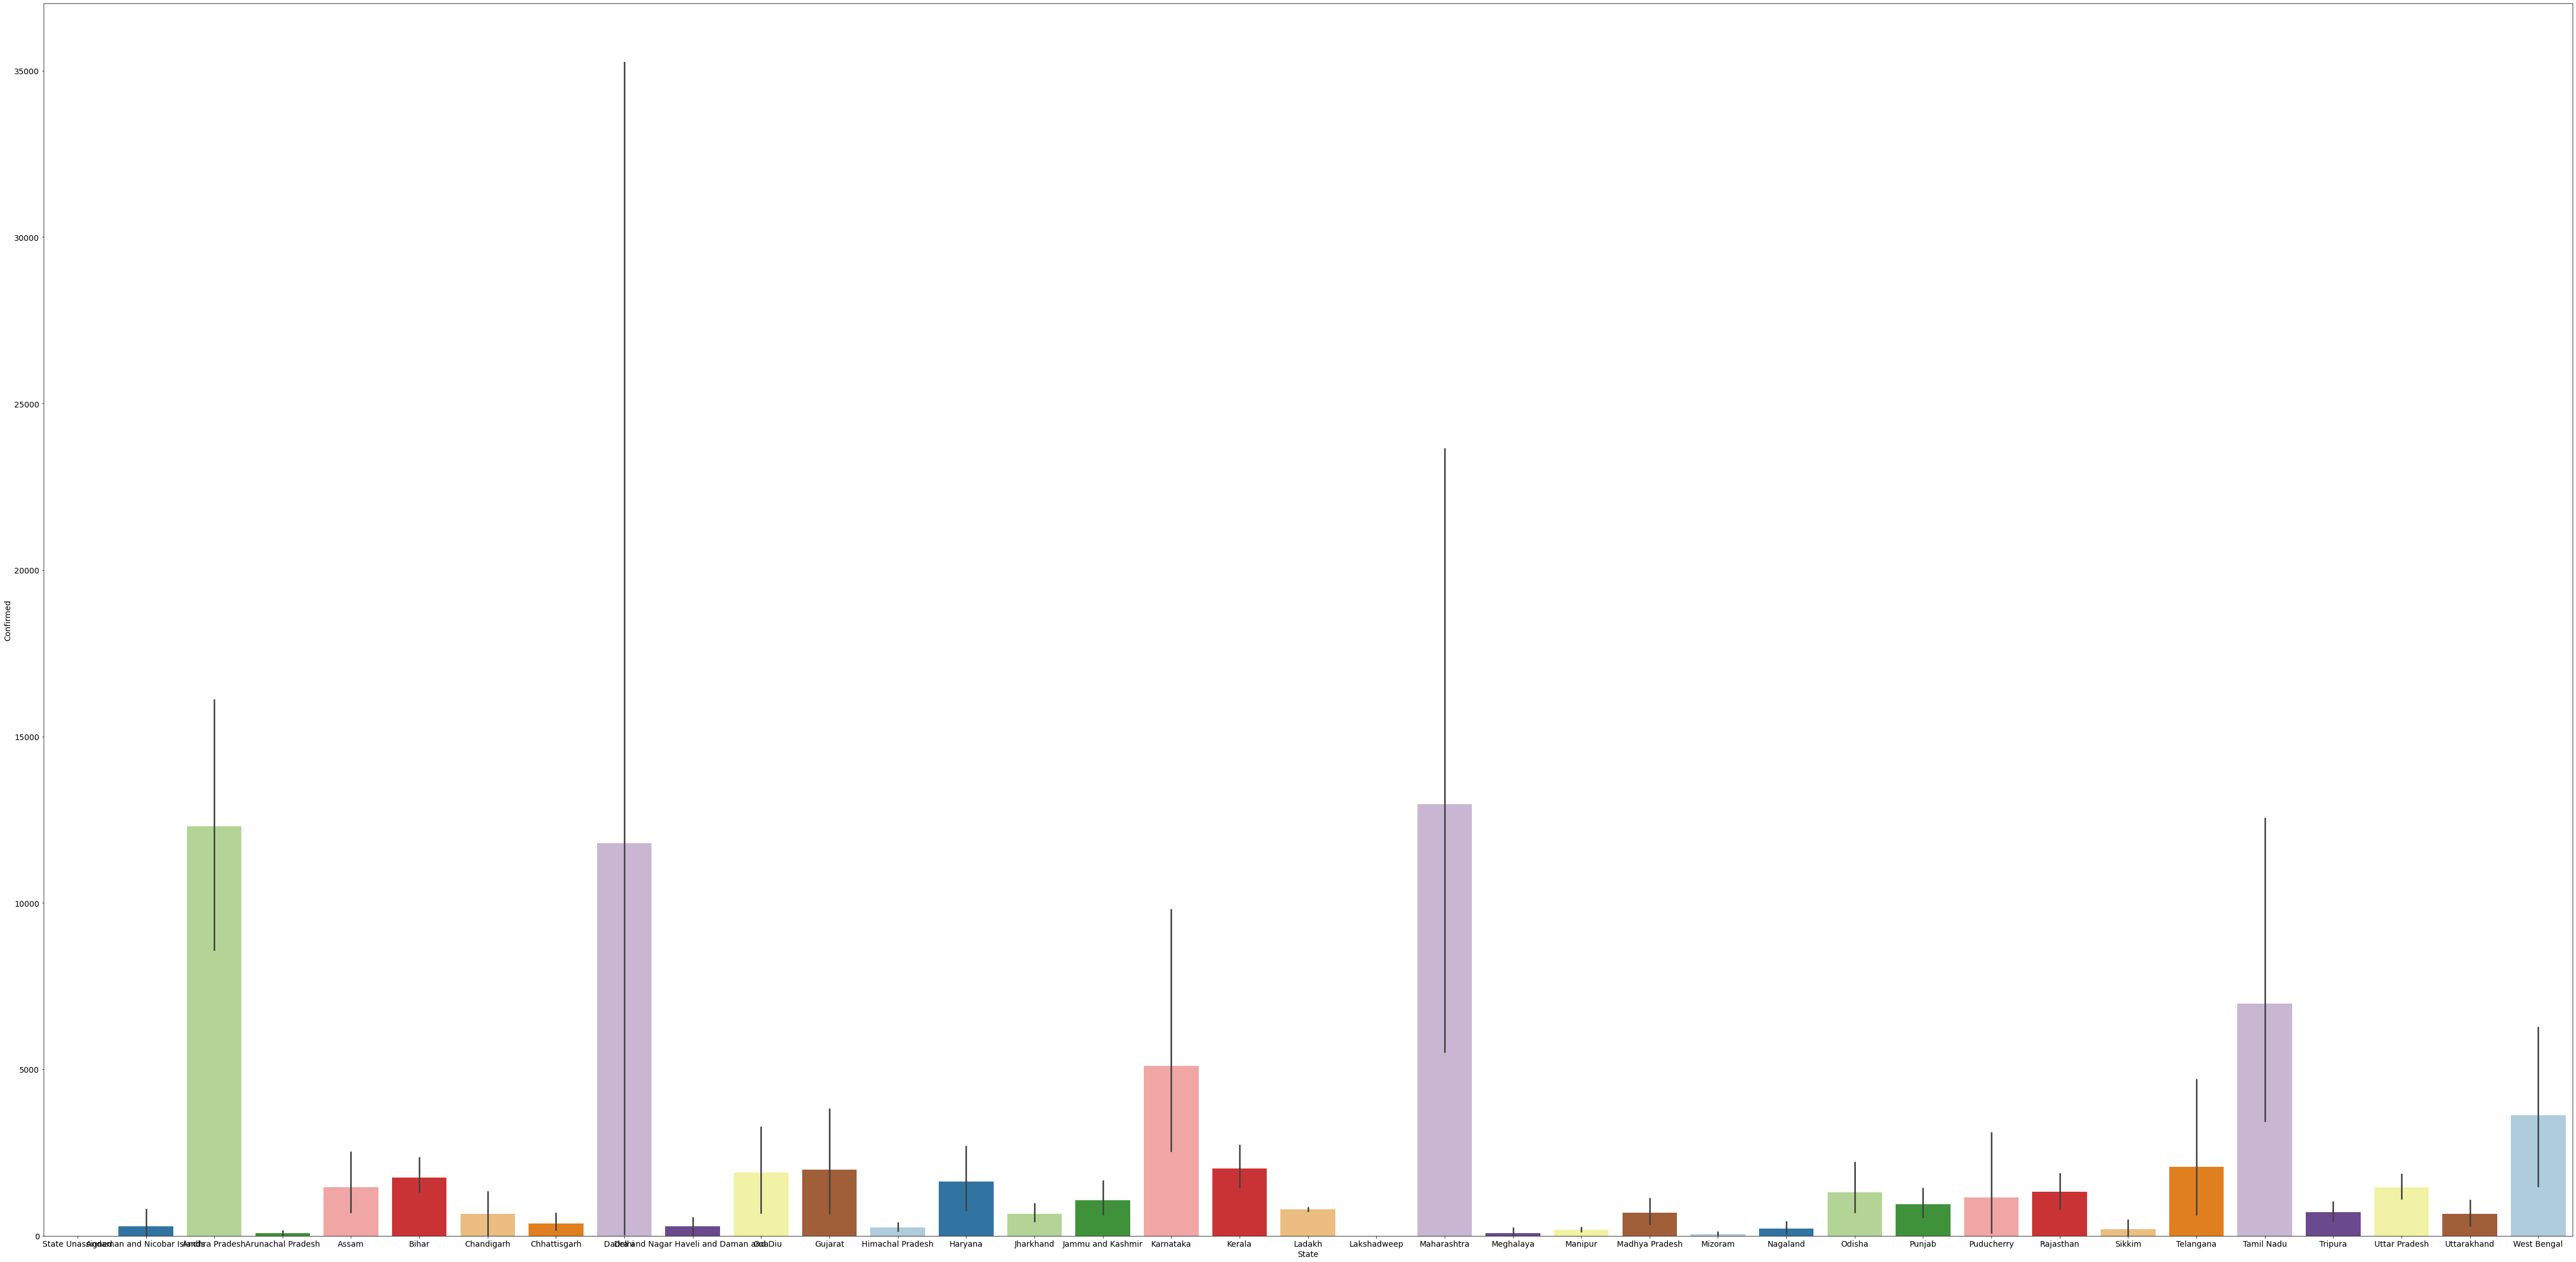

In [31]:
State_sebon =  sns.barplot(data = cor,x = "State",y = "Confirmed", palette = 'Paired')

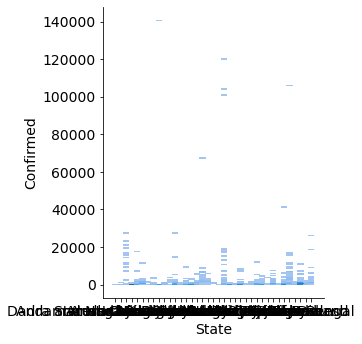

In [32]:
State_sebon =  sns.displot(data = cor, x ="State", y = "Confirmed",  palette = 'Paired')

<AxesSubplot:xlabel='State'>

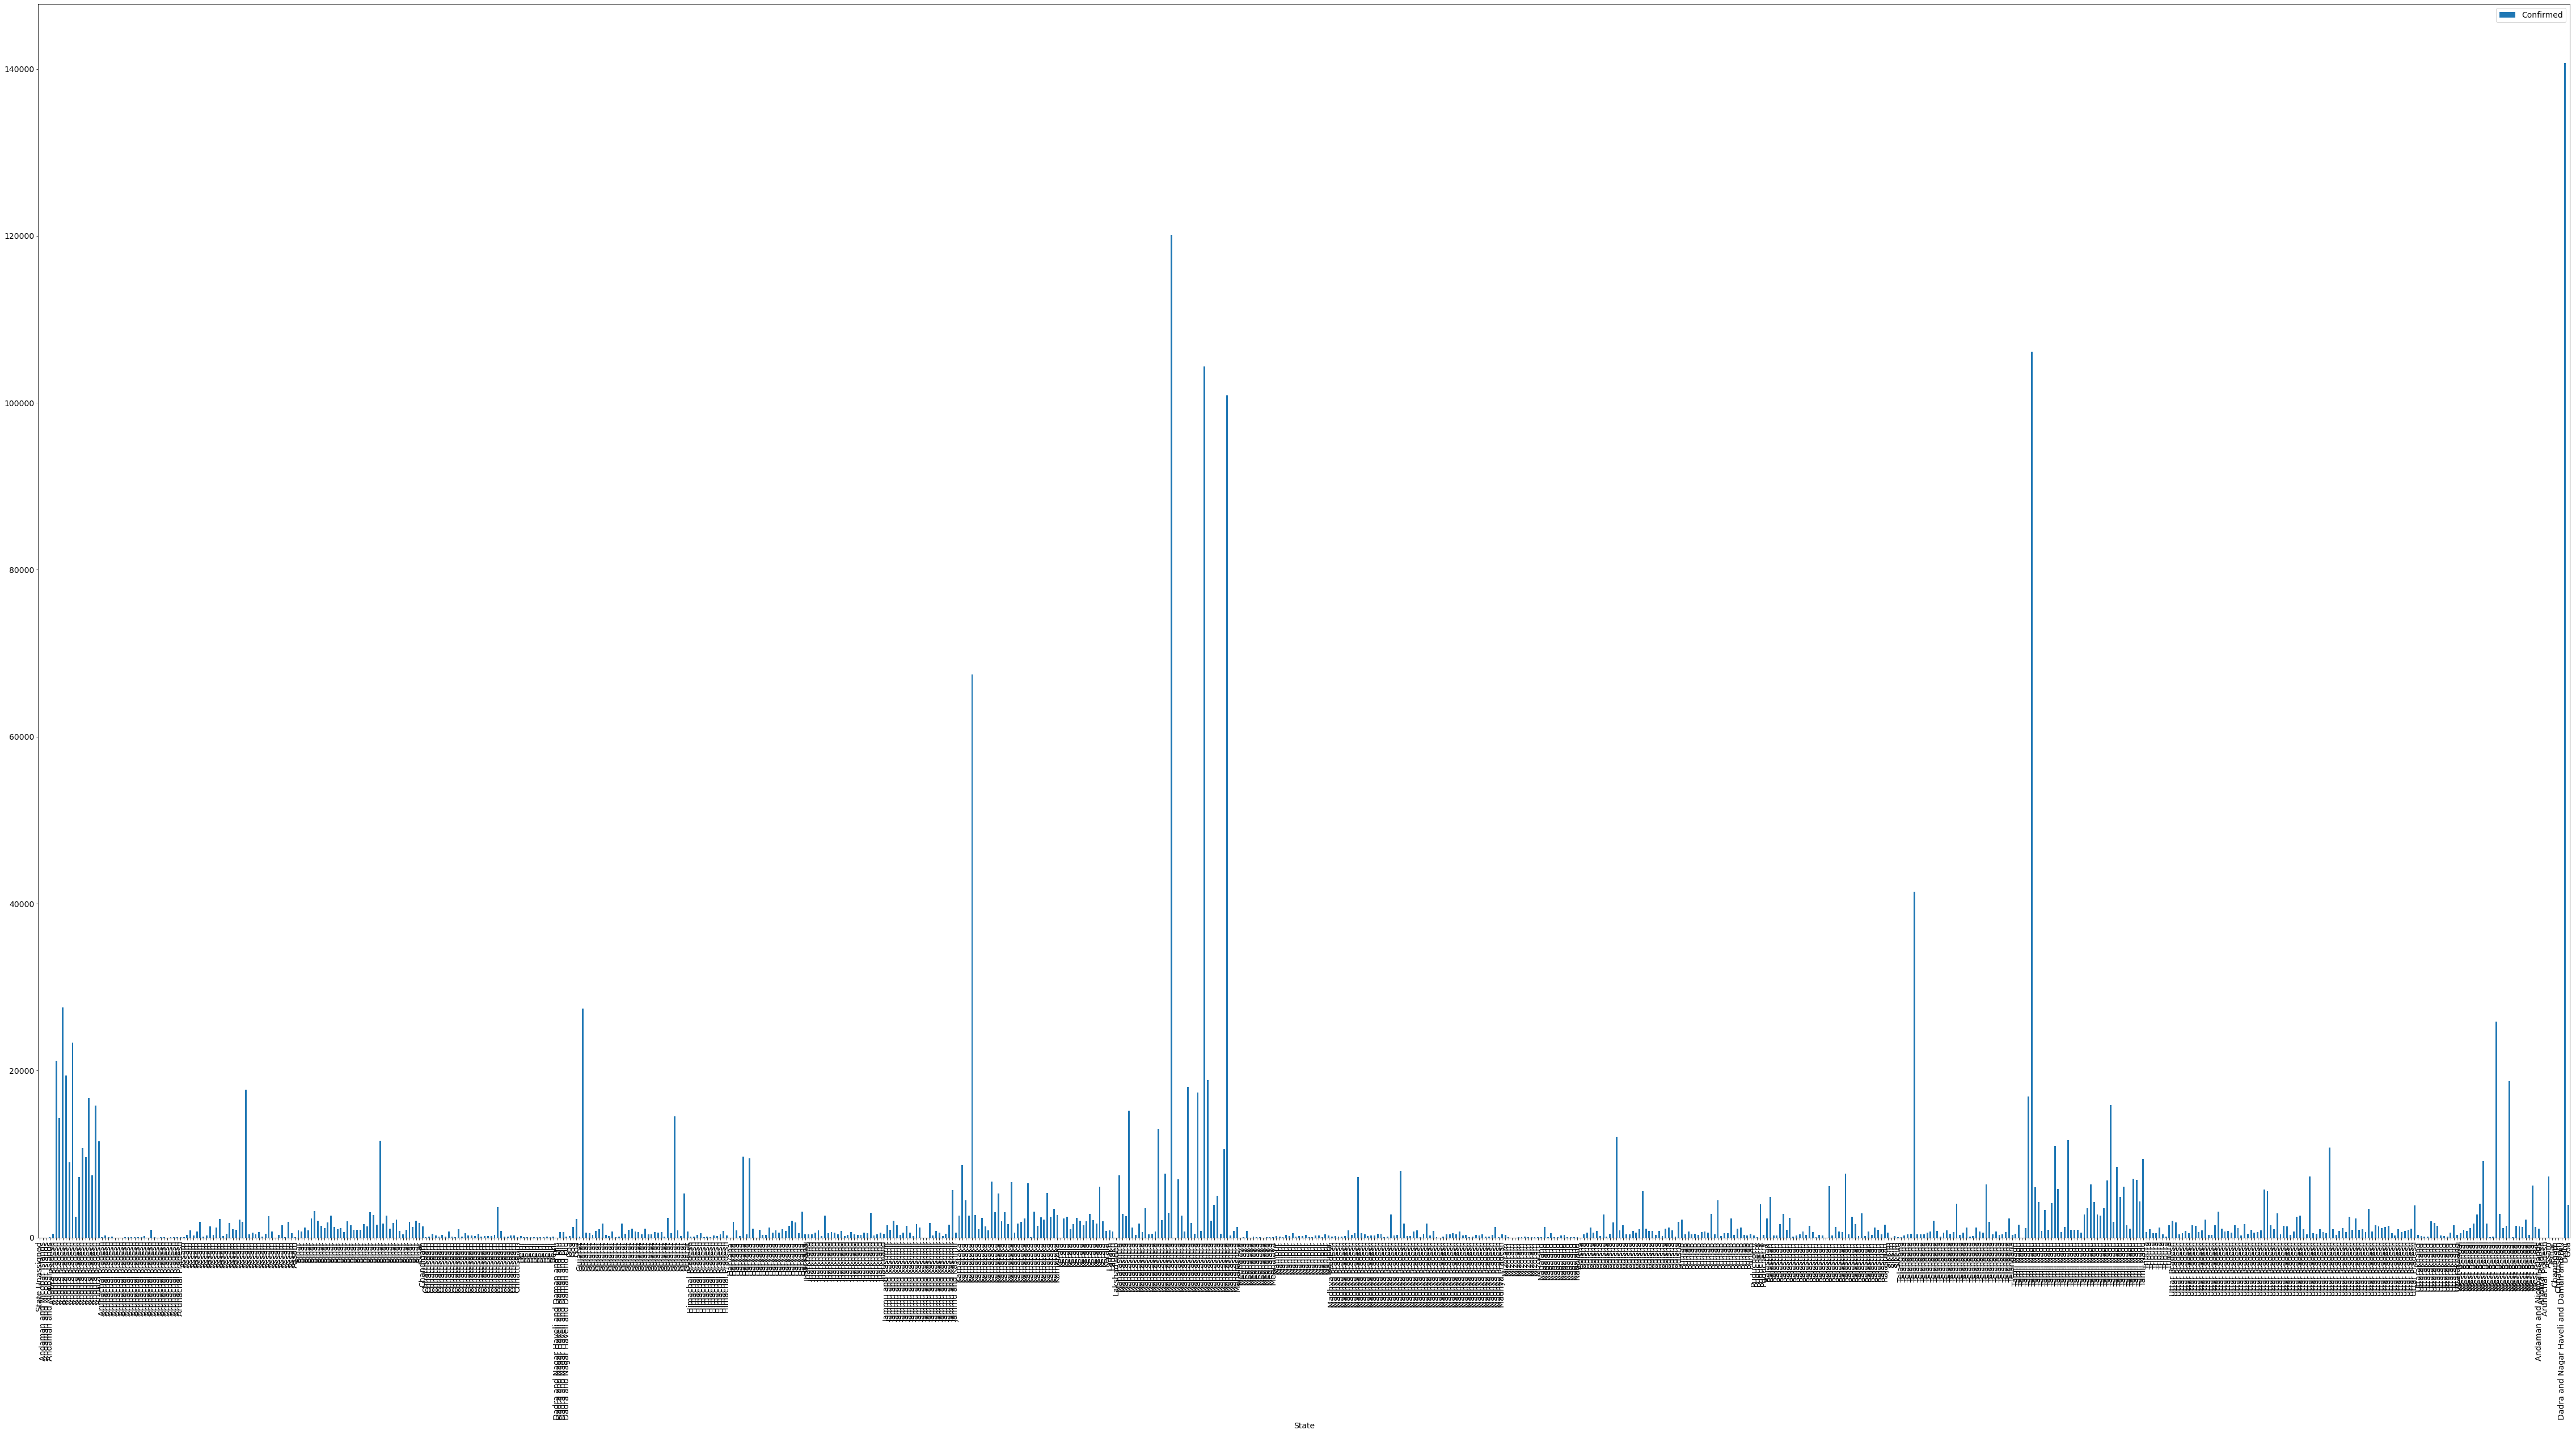

In [33]:
cor.plot( x ="State", y = "Confirmed", kind = 'bar')


In [34]:
plt.show()

# Relation btw District_Key and Recovered data

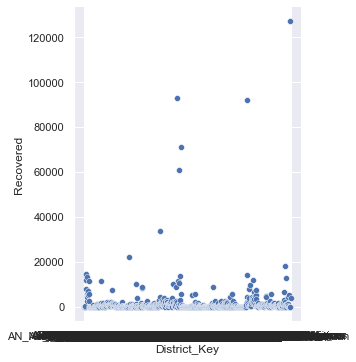

In [35]:
sns.set()
sns.relplot(x='District_Key', y='Recovered', data=cor)

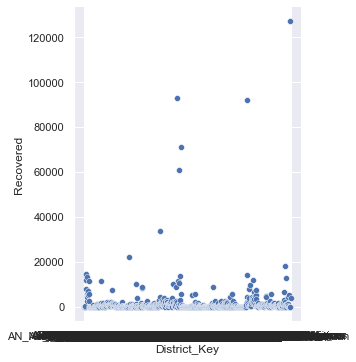

In [36]:
sns.relplot(x="District_Key", y="Recovered", palette = 'Paired', data=cor)

# relation betweendistrict of AS, OR and An V/S Active cases

In [37]:
df = cor[
        (cor['District_Key'] == 'AS')
    
        | (cor['District_Key'] == 'OR')
        | (cor['District_Key'] == 'AN')
       ]
sns.catplot(x='District_Key', y='Active', data=airports_df)

NameError: name 'airports_df' is not defined

In [ ]:
sns.catplot(x='District_Key', y='Active', kind='violin', data=airports_df)